# 1208. Get Equal Substrings Within Budget

### Difficulty: <font color = orange> Medium </font>

---

You are given two strings `s` and `t` of the same length and an integer `maxCost`.

You want to change `s` to `t`. Changing the `ith` character of `s` to `ith` character of t costs `|s[i] - t[i]|` (i.e., the absolute difference between the ASCII values of the characters).

Return the maximum length of a substring of `s` that can be changed to be the same as the corresponding substring of `t` with a cost less than or equal to `maxCost`. If there is no substring from `s` that can be changed to its corresponding substring from `t`, return `0`.

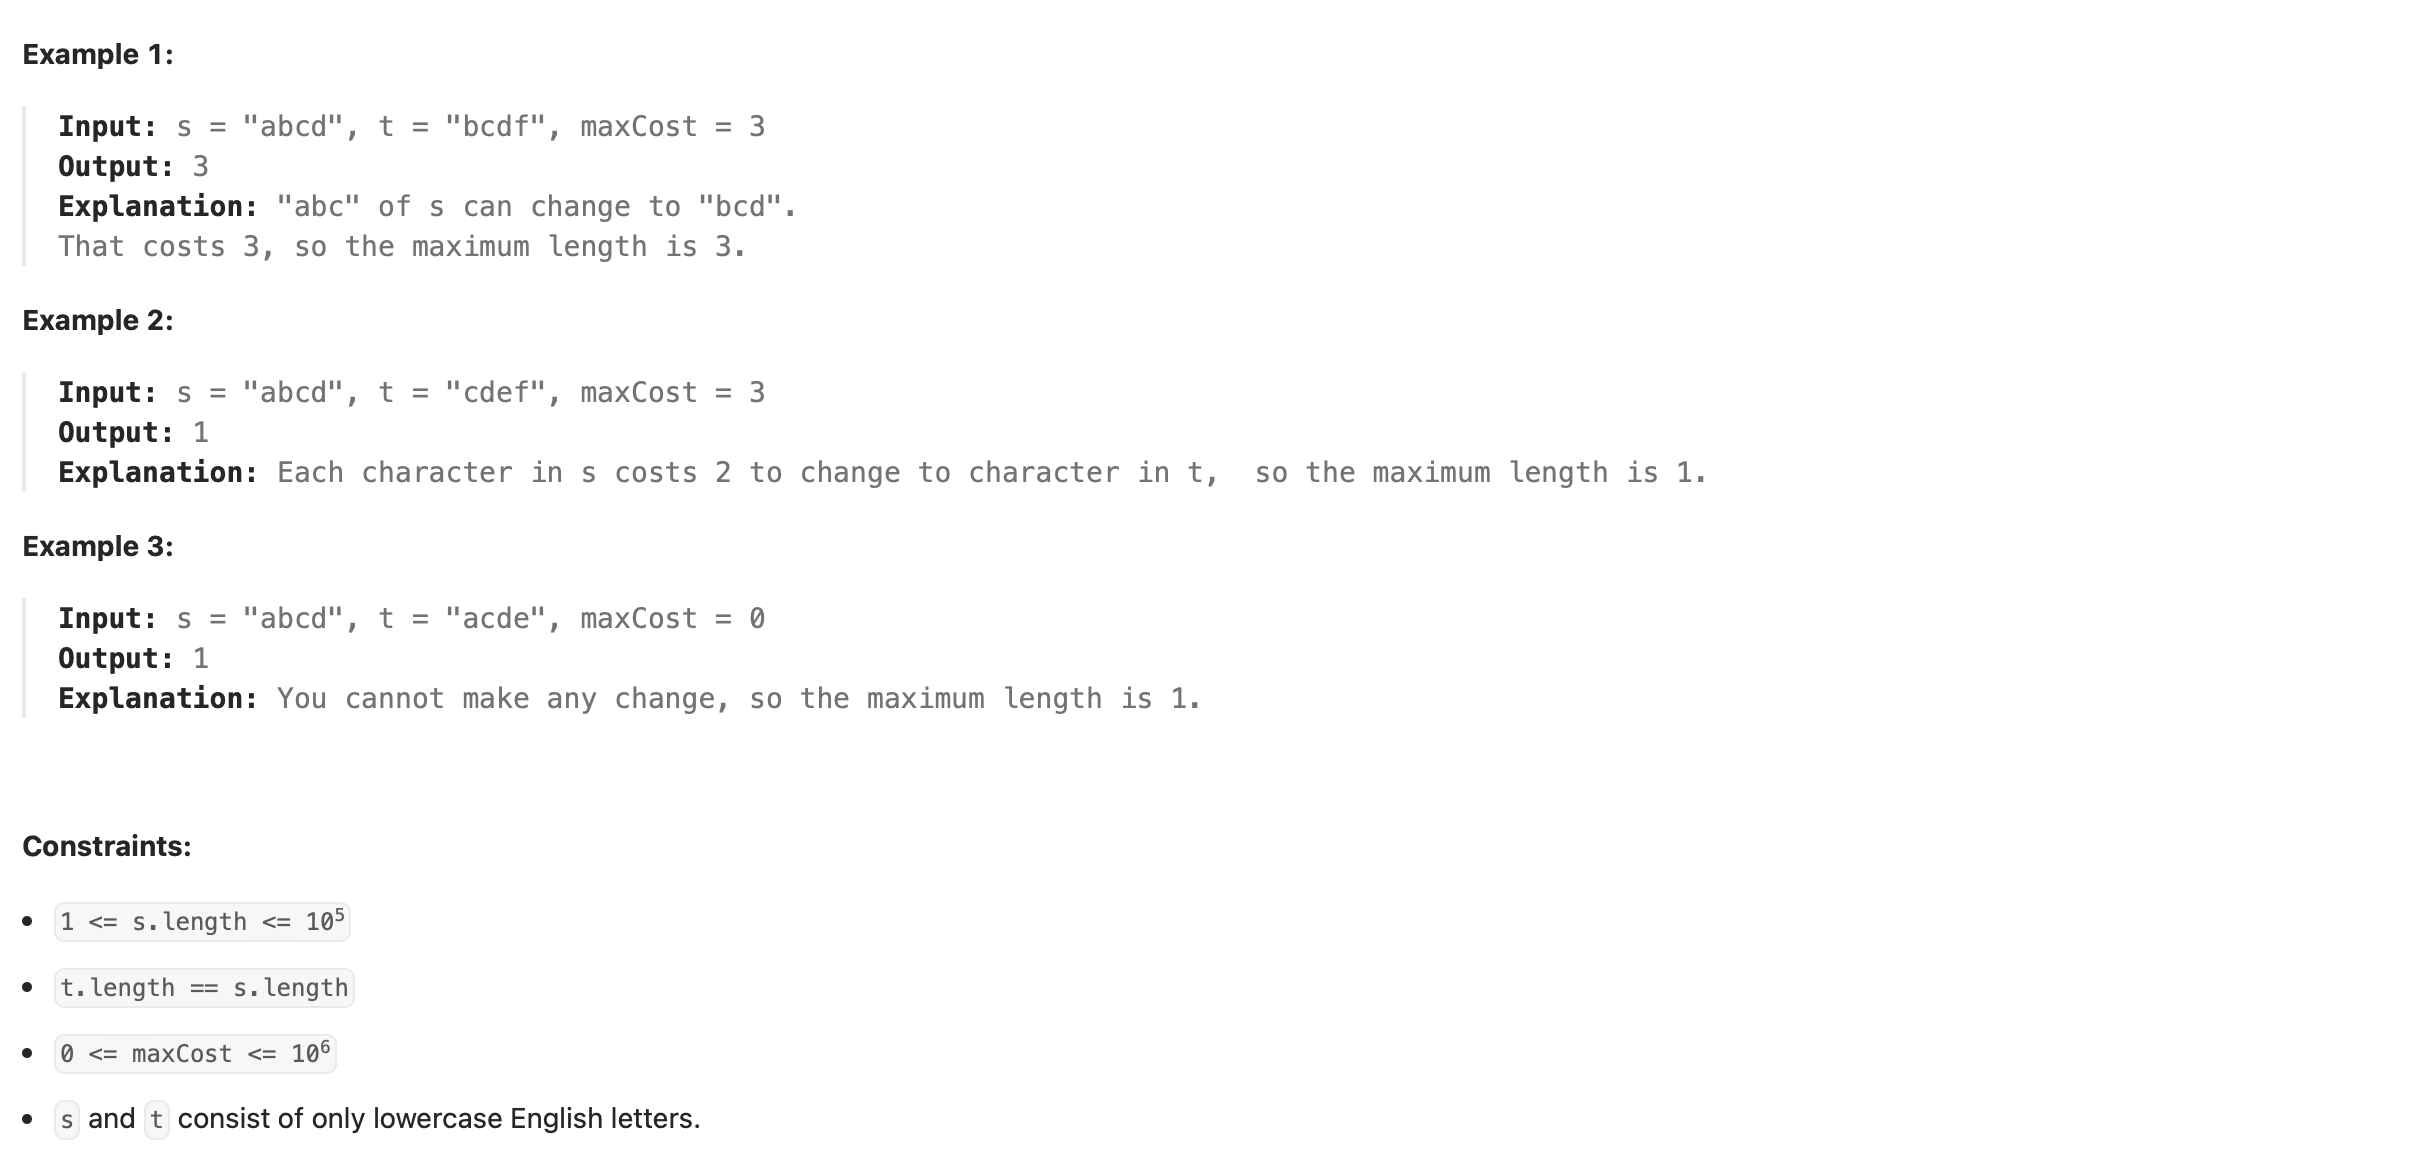

## Approach Overview:

Scan through every character position in `s` and using sliding window technique track of the length longest valid substring of `s` (substring is valid if total cost of changing `s` characters relative to `t` characters is `<= maxCost`). 

- If current substring of `s` is valid (i.e. if `total character replacement cost <= maxCost`) then just compute its length and then move on to the next character (so we can continue substring expansion and find the longest possible substring).

- If not valid (i.e. if `total character replacement cost > maxCost`), then start shrinking substring window (i.e. start removing characters from current substring window until substring is valid again). We start shrinking process by removing leftmost character in `s` and its associated cost until substring and its total cost is once again valid. Once substring is valid we then continue with the susbtring expansion in `s` (to find longest valid possible one).


## Detailed Explanation:

So basically this is classic sliding window. 

What we given are two string, `s` and `t`. And we have to find the longest possible susbtring within `s` that we can form such that if we replace every single character in the substring to be the same as that of `t`, then the total character replacement cost works out to be `<= maxCost`.

Here's an example. 

Say `maxCost= 3`, `s = "abcd"` & `t = "bcde"`. 

1) If we replaced (changed) "a" to be "b" that would cost 1 (because ascii(a) - ascii(b) = 1) 
2) If we replaced (changed) "b" to be "c" that would cost 1 (because ascii(b) - ascii(c) = 1)
3) If we replaced (changed) "c" to be "d" that would cost 1 (because ascii(c) - ascii(d) = 1)

The total cost would be 3 and maximum "valid" susbtring of `s` we could form would be 3 (because size of "bce" is 3) 

Notice that the fourth (4) character replacement (i.e. "d" to "e") would result in a total cost of 4, which is bigger than our `maxCost` limit. 

#### Substring expansion condition:

We continue expanding the substring as long as the total character replacement cost is less than or equal to `maxCost`. So at each iteration we first calculate the total character replacement cost and then check if it's less than or equal to `maxCost`.

`cost += abs(ord(s[right])-ord(t[right]))`


#### Substring shrinking condition:

*Check if total character replacement cost in current `s` substring window  exceeds `maxCost`*

`while cost > maxCost:`

   *If yes then this means the substring window is invalid and we need to shrink this window until it becomes valid again*
   
   *Shrink window by removing leftmost character in substring and its associated cost*
   
   `cost -= abs(ord(s[left])-ord(t[left]))`
   
   *Increment `left` pointer*
   *Move substring window so it now starts at next leftmost character in `s`*
   
   `left += 1`


If all checks out, we then compute the substring's length :)

`maxLength = max(maxLength, right - left + 1)`

## Key Challenges:

Wrong algorithmic implementation of sliding window algo. Managed to figure out the pattern and "solve the problem" but did a very poor job of implementing the code solution. Had to look up the solution. Once I did look it up and similar past problems, i noticed a clear pattern in the code solution to these longest substring problem types. 

You basically use a `for loop` whose counter keep tracks of the last element in the substring window and as long as the window remains valid, then you keep expanding it.

We use a while loop to detect invalid substring windows.

`while condition that makes window valid is broken:`


`shrink the window until window becomes valid again` :)



## Solution:

In [ ]:
class Solution:
    def equalSubstring(self, s: str, t: str, maxCost: int) -> int:

        # initialize maxLength (to keep track of max length of substring s)
        maxLength = 0
        
        # initialize left pointer
        left = 0
        
        # initialize cost (the absolute diff between the ASCII values of the characters)
        cost = 0
        
        # loop through every character position in s
        for right in range(len(s)):
            
            # calculate the current cost 
            # (the absolute difference between the ASCII values of the current characters in s and t) 
            cost += abs( ord(s[right]) - ord(t[right]) )
            
            # check if current cost is more than the maximum cost
            while cost > maxCost:
                
                # if yes then remove the leftmost character in s and it's corresponding cost from the current substring window
                cost -= abs(ord(s[left]) - ord(t[left]))
                
                # increment left (shrink the substring window by looking at the next leftmost character in `s`)
                left += 1
            
            # calculate the length of current valid substring of s
            maxLength = max(maxLength, right - left + 1)
                   
        # return the length of the longest valid substring of s    
        return maxLength 